# Introduction to interest rates
There is no doubt that interest rates play an important role in our economy. When the
economy is expanding, interest rates tend to go high since the high demand of capital
would push up borrowing rates. In addition, inflation might go up as well. When this
is happening, central banks will do their best to control the inflation at an appropriate
level. One tool to fight the potential inflation hike is to increase banks' lending rates.
On the other hand, the bond price is negatively correlated with interest rates.
There is a good chance that many are confused with the
difference between simple interest and compound interest. Simple interest does
not consider interest on interest while compound interest rate does. Assume that
we borrow $1,000 today for 10 years. What are the future values at the end of each
year if the annual rate is 8%? Assume that this annual rate is both the simple and
compounded interest rates. Their corresponding formulae are shown here:

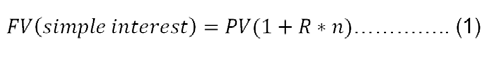

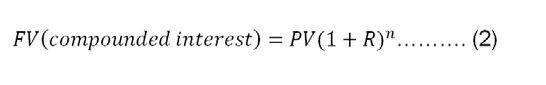

Here, PV is the loan today, R is the period rate, and n is the number of periods. The
graphic representation of the principal, the future values with a simple interest rate,
and the future values with a compound interest rate are shown in the diagram which
follows.and the middle one(future values with a simple interest rate) is interest on interest:

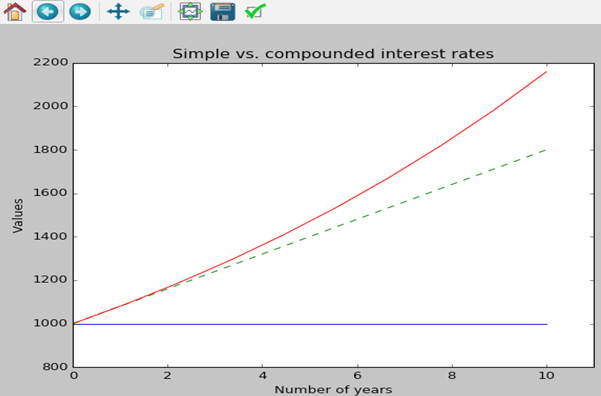

First, let's see the conversional way to estimate an effective rate for a given Annual
Percentage Rate (APR) and a compounding frequency (m):

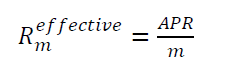

Here, is an effective period rate with respect to a certain period (identified
by m), APR is Annual Percentage Rate and m is the compounding frequency. The
values of m could be 1 for annual, 2 for semi-annual, 4 for quarterly, 12 for monthly,
and 365 for daily. If APR is 10% compounded semi-annually, then the effective
semi-annual rate is 5% (=0.10/2). On the other hand, if APR is 0.08 compounded
quarterly, then the effective quarterly rate is 2% (=0.08/4).
Here is an example related to house mortgage. John Doe intends to buy a house in
Buffalo, New York, with a price tag of $240,000. He plans to pay 20% of the price
of the house as a down payment and borrow the rest from M&T Bank. For a 30-
year mortgage, the bank offers an annual rate of 4.25%. How much is his monthly
mortgage payment?

In [1]:
import scipy as sp
sp.pmt(0.045/12,30*12,240000*0.8)

-972.8357948657007

To compare two rates with different compounding frequencies, we have to convert
them into the same rates before we could compare. One such effective rate is called
Effective Annual Rate (EAR). For a given APR with a compounding frequency of m,
its EAR is calculated here:

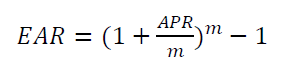

Assume that a company plans to borrow $10m for a long-term investment project.
Bank A offers an annual rate of 8% compounded semi-annually, while bank B offers
a rate of 7.9% compounded quarterly. For the company, which borrowing rate is
cheaper? By applying the preceding formula, we have the following results. Since
8.137% is lower than 8.160%, the offer from bank B is better:

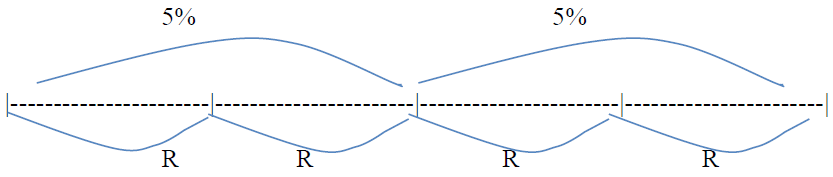

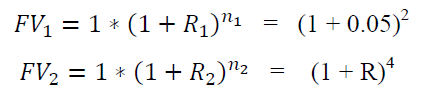

In [5]:
(1+0.05)**(2/4)-1

0.02469507659595993

Alternatively, we could apply certain formula directly. Here, we show how to derive
two formula: from APR to Rm and from APR1 to APR2. For formula between two
annual rates of APR1(m1)and APR2(m2)is given here:

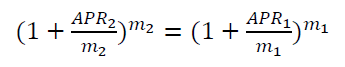

In [6]:
def APR2Rm(APR1,m1,m2):
    return (1+APR1/m1)**(m1/m2)-1

For the same example, a bank offers10% annual rate compounding semi-annually.
What is its equivalent effective quarterly rate? By applying Equation (7) with a set of
input values of APR1=0.10, m1=2, and m2=4, see the following code:

In [7]:
APR2Rm(0.1,2,4)

0.02469507659595993

To get the second APR(APR2) for a given APR and its corresponding frequency, we
have the following formula:
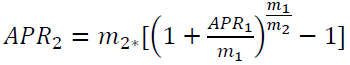

In [8]:
def APR2APR(APR1,m1,m2):
    return m2*((1+APR1/m1)**(m1/m2)-1)

For a continuously compounded interest rate, different ways could be used to
explain this confusion concept. First, we apply the formula of Effective Annual Rate
(EAR) by increasing the compounding frequency of m:
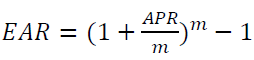

For example, if APR is 10% and compounded semi-annually, EAR will be 10.25%:

In [10]:
(1+0.1/2)**2-1

0.10250000000000004

In [11]:
def EAR_f(APR,m):
    return (1+APR/m)**m-1

Next, assume that the APR is 10% and let's increase the compounding frequency, see
the following program:

In [12]:
import numpy as np
d=365
h=d*24
m=h*60
s=m*60
ms=s*1000
x=np.array([1,2,4,12,d,h,m,s,ms])
APR=0.1
for i in x:
    print(EAR_f(APR,i))

0.10000000000000009
0.10250000000000004
0.10381289062499954
0.10471306744129683
0.10515578161623251
0.10517028727456146
0.10517090753998182
0.10517091994187133
0.10517230537146749


Actually, when the compounding frequency approaches an infinity, the limit will
be our continuously compounded rate with a formula of EAR=exp(Rc)-1, see the
following code:

In [14]:
np.exp(0.1)-1

0.10517091807564771

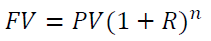
Here, FV is the future value, PV is the present value, R is the effective period rate and
n is the number of periods. Another way to calculate the future value of one present
value is using a continuously compounded rate, Rc. Its formula is given here:

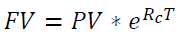

Here, Rc is the continuously compounded rate, T is time when the future value is
calculated (in years). If we choose one year as T and $1 as PV, equaling the preceding
two equations would lead to the following one:
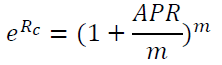

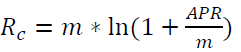

Here, log() is the natural logarithm function. Assume that the APR is 2.34%
compounded semi-annually. What is its equivalent Rc?

In [15]:
from math import log
def APR2Rc(APR,m):
    return m*log(1+APR/m)
APR2Rc(0.0234,2)

0.023264168459415393

Similarly, for a given Rc, we have the following formula to calculate its
corresponding APR:
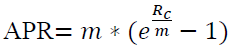

In [17]:
def Rc2APR(Rc,m):
    return m*(np.exp(Rc/m)-1)
Rc2APR(0.02,2)

0.020100334168335898

In [18]:
(1+0.05)**2


1.1025

## Term structure of interest rates
The term structure of interest rates is defined as the relationship between risk-free
rate and time. A risk-free rate is usually defined as the default-free treasury rate.
From many sources, we could get the current term structure of interest rates. For
example, on 12/21/2016, from Yahoo!Finance at http://finance.yahoo.com/
bonds, we could get the following information:
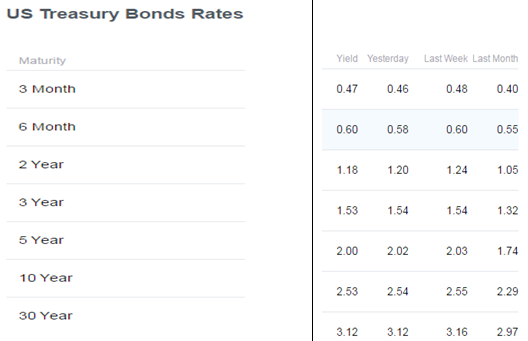

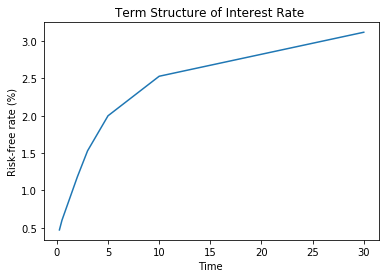

In [22]:
from matplotlib.pyplot import *
time=[3/12,6/12,2,3,5,10,30]
rate=[0.47,0.6,1.18,1.53,2,2.53,3.12]
title("Term Structure of Interest Rate ")
xlabel("Time ")
ylabel("Risk-free rate (%)")
plot(time,rate)
show()

## The duration
The duration is a very important concept for risk analysis and hedging. The duration
is defined as: the number of years needed to recover our initial investment. Let's look
at the simple case: a zero-coupon bond. Today, we buy a 1-year zero-coupon bond.
One year later, we would receive its face value of $100. Its timeline and cash flow are
shown here:

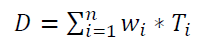

D is duration, n is the number of cash flows, wi is the weight of the ith cash flow, and
wi is defined as the present value of ith cash flow over the present values of all cash
flows, Ti is the timing (in years) of the ith cash flow. Here, a Python function called
duration is written:

In [23]:
def duration(t,cash_flow,y):
    n=len(t)
    B=0 # B is the bond's present value
    for i in range(n):
        B+=cash_flow[i]*exp(-y*t[i])
    D=0 # D is the duration
    for i in range(n):
        D+=t[i]*cash_flow[i]*exp(-y*t[i])/B
    return D

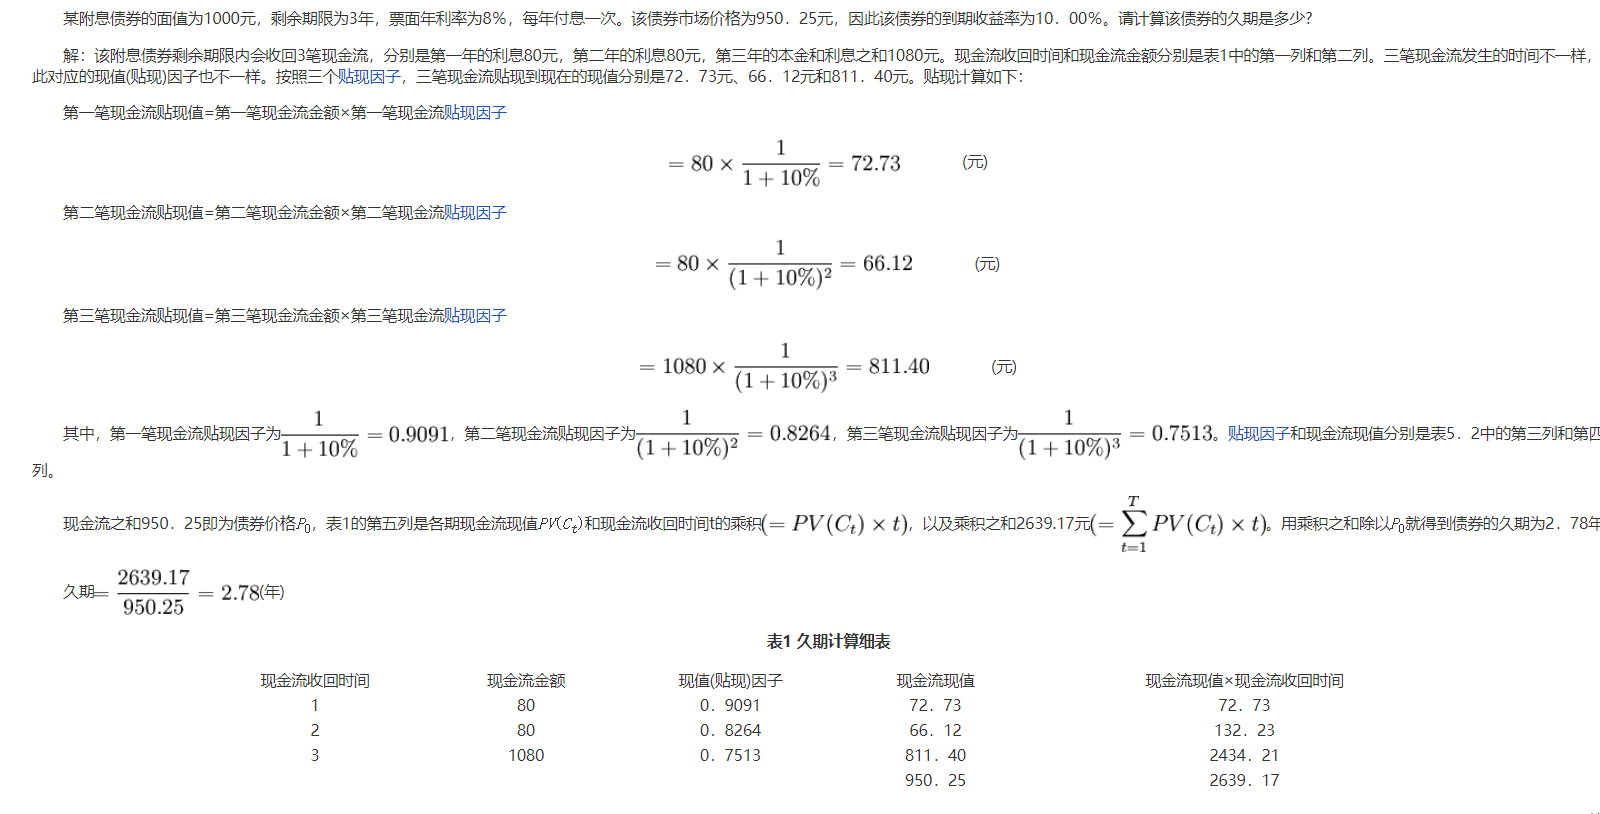

## Bond evaluation
Bond is also called fixed income security. There are different types of categories.
Based on maturity, bonds could be classified into short-term, median-term, and longterm.
For US Treasury securities, T-bills are the securities issued by the Department of
Treasury with a maturity less than 1 year, T-notes are for government bonds beyond 1
year but less than 10 years. T-bonds are treasury securities with a maturity beyond 10
years. Based on coupon payments, there are zero-coupon bonds and coupon bonds.
When it is a central government's bond, we call them risk-free bonds since the central
government usually has a right to print money, that is by default, free.

If a bond holder could convert his/her bond into the underlying common stock with
a predetermined number of shares before maturity, it is called a convertible bond.
If a bond issuer could retire or buy back a bond before its maturity, it is named a
callable bond. On the other hands, if the bond buyers could sell the bond back to
the original issuers before maturity, it is balled a puttable bond. The cashflow for a
zero-coupon bond is shown here:

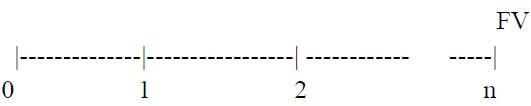

Recall that for the present value of one future cash flow and the present value of
annuity, we have the following two formulae:
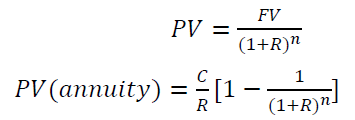

Here, C is a constant cash flow and n is the number of periods. The price of a coupon
bond is the combination of these two types of payments:

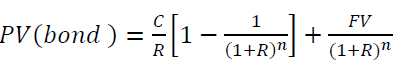

The scipy.pv() function could be used to calculate the price of bond. Assume that
the effective annual rate is 2.4%:

In [24]:
import scipy as sp
sp.pv(0.024,3,0.08*100,100)

-116.0247325897217

Since the price of a bond is the present value of its all future cash flows, its price
should be negatively correlated with the discount rate. In other words, should the
interest rate increase, the price of bonds would fall, and vice versa.

Yield to Maturity (YTM) is the same concept as International Rate of Return (IRR).
Assume that we bought a zero-coupon bond for $717.25. The face value of the bond
is $1,000 and it would mature in 10 years. What is its YTM? For a zero-coupon bond,
we have the following formula for YTM:
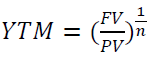

Here,FV is the face value, PV is the price of the zero-coupon bond and
n is the number of years (maturity).By applying the formula, w

In [25]:
(1000/717.25)**(1/10)-1

0.033791469771228044

Assume that we bought a bond for 825 today. It has a maturity term of 5 years. The
coupon rate is 3% and coupon payments are annual. If the face value is 1,000, what
is the YTM? The scipy.rate() function could be used to estimate the YTM:

In [26]:
import scipy as sp
sp.rate(5,0.03*1000,-818,1000)

0.07498180431487073

## Stock valuation
There are several ways to estimate the price of a stock. One method is called the
dividend discount model. The logic is that the price of a stock today is simply the
summation of the present value of all its future dividends. Let's use the simplest one
period model to illustrate. We expect a $1 dividend at the end of one year and its
selling price is expected to be 50. If the appropriate cost of equity is 12%, what is the
price of stock today? The timeline and future cash flows are shown here:
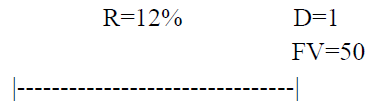

In [1]:
import scipy as sp
sp.pv(0.12,1,1+50)

-45.53571428571432

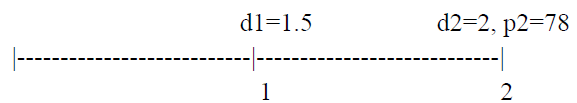
Assume that for this stock, the appropriate discount rate is 14%. Then the present
value of the stock is $62.87:

In [2]:
1.5/(1+0.14)+(2+78)/(1+0.14)**2

62.873191751308084

Along the same lines, we could estimate the cost of equity if both the present value
and futures values are given. If the current price is $30 and the expected selling price
at the end of one year is 35:
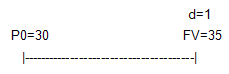
Then we could estimate the total return:

In [3]:
(35-30+1)/30

0.2

The total return, cost of equity (Re), has two components: capital gain yield and
dividend yield: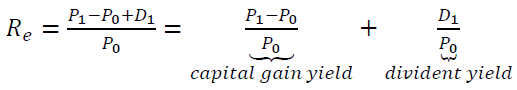

The capital gain yield is 16.667% while the dividend yield is 3.333%. Another
possible scenario is that a stock might enjoy a constant dividend growth rate.
Company A is expected to issue a $4 dividend next year and enjoys a constant
dividend growth rate of 2% afterward. If the cost of equity is 18%, what will be the
stock price today? From Chapter 3, Time Value of Money, we know that the present
value of growing perpetuity formula could be applied:
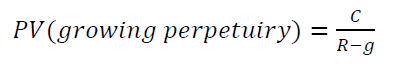

By using the correct notation, that is, P0 as today's stock price, d1 as the first expected
dividend, we could have the following equivalent pricing formula
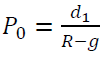

From the following results, we know that today's price should be $25:4/(0.18-0.02)